# Titanic Problem 

## The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

### Dataset
We have 3 dataset:
- train.csv to train the model of Machine Learning;
- test.csv to test the model done;
- gender_submission that makes hypothesis of only female survive (it's an example of output);

### Variable Notes

- **pclass**: A proxy for socio-economic status (SES)

    - 1st = Upper;
    - 2nd = Middle;
    - 3rd = Lower;


- **age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5


- **sibsp**: The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)


- **parch**: The dataset defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.


<img src="nutshell.png" alt="drawing" width="600"/>

##### Problem Analysis:
We want to predict who saved in Titanic shipwreck using data of people who saved. It is a problem of classification. Variables useful could be, gender and age because one could think there is a priority in saving women and children. There could be a survival for body shape as muscle bound could be a greater percentage of survival. Probably could be saved people in First Class

# Solution

## Setting Environment

In [1]:
## import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

le = preprocessing.LabelEncoder()
min_max_scaler = preprocessing.MinMaxScaler()

## Exploratory Data Analysis

In [2]:
df = pd.read_csv('./train.csv')
df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [3]:
## Let's see the shape of dataframe
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


50% people are in 3rd class.
- 25% people are 0-20 years old;
- 25% people are 20-28 years old;
- 25% people are 27-38 years old;
- 25% people are 38-80 years old;

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are NaN values for Age that could be an important variable, so one could drop nan rows. Cabin is Nan and it could be not very relevant. The same for Embarked

7 variables are numerical and 5 are categorical

Sex is an interesting variable so one could use One Hot Encoding or Label Encoding.

In [6]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Being just two kind of samples one could use label encoding (1 or 0). One hot encoding makes gravitate the number of features but label encoding could lead on using numbers as introducing a sorting relationship.


In [7]:
df['Sex'] = le.fit_transform(df['Sex'])

In [8]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

So 1 is for male and 0 for female

In [9]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

There are just 3 ports, we can label encode it. But there are Nan values

In [10]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [11]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

In [12]:
rows_with_NaN

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",1,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [13]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN


**We could also group by cabin or ticket number to find group or families**


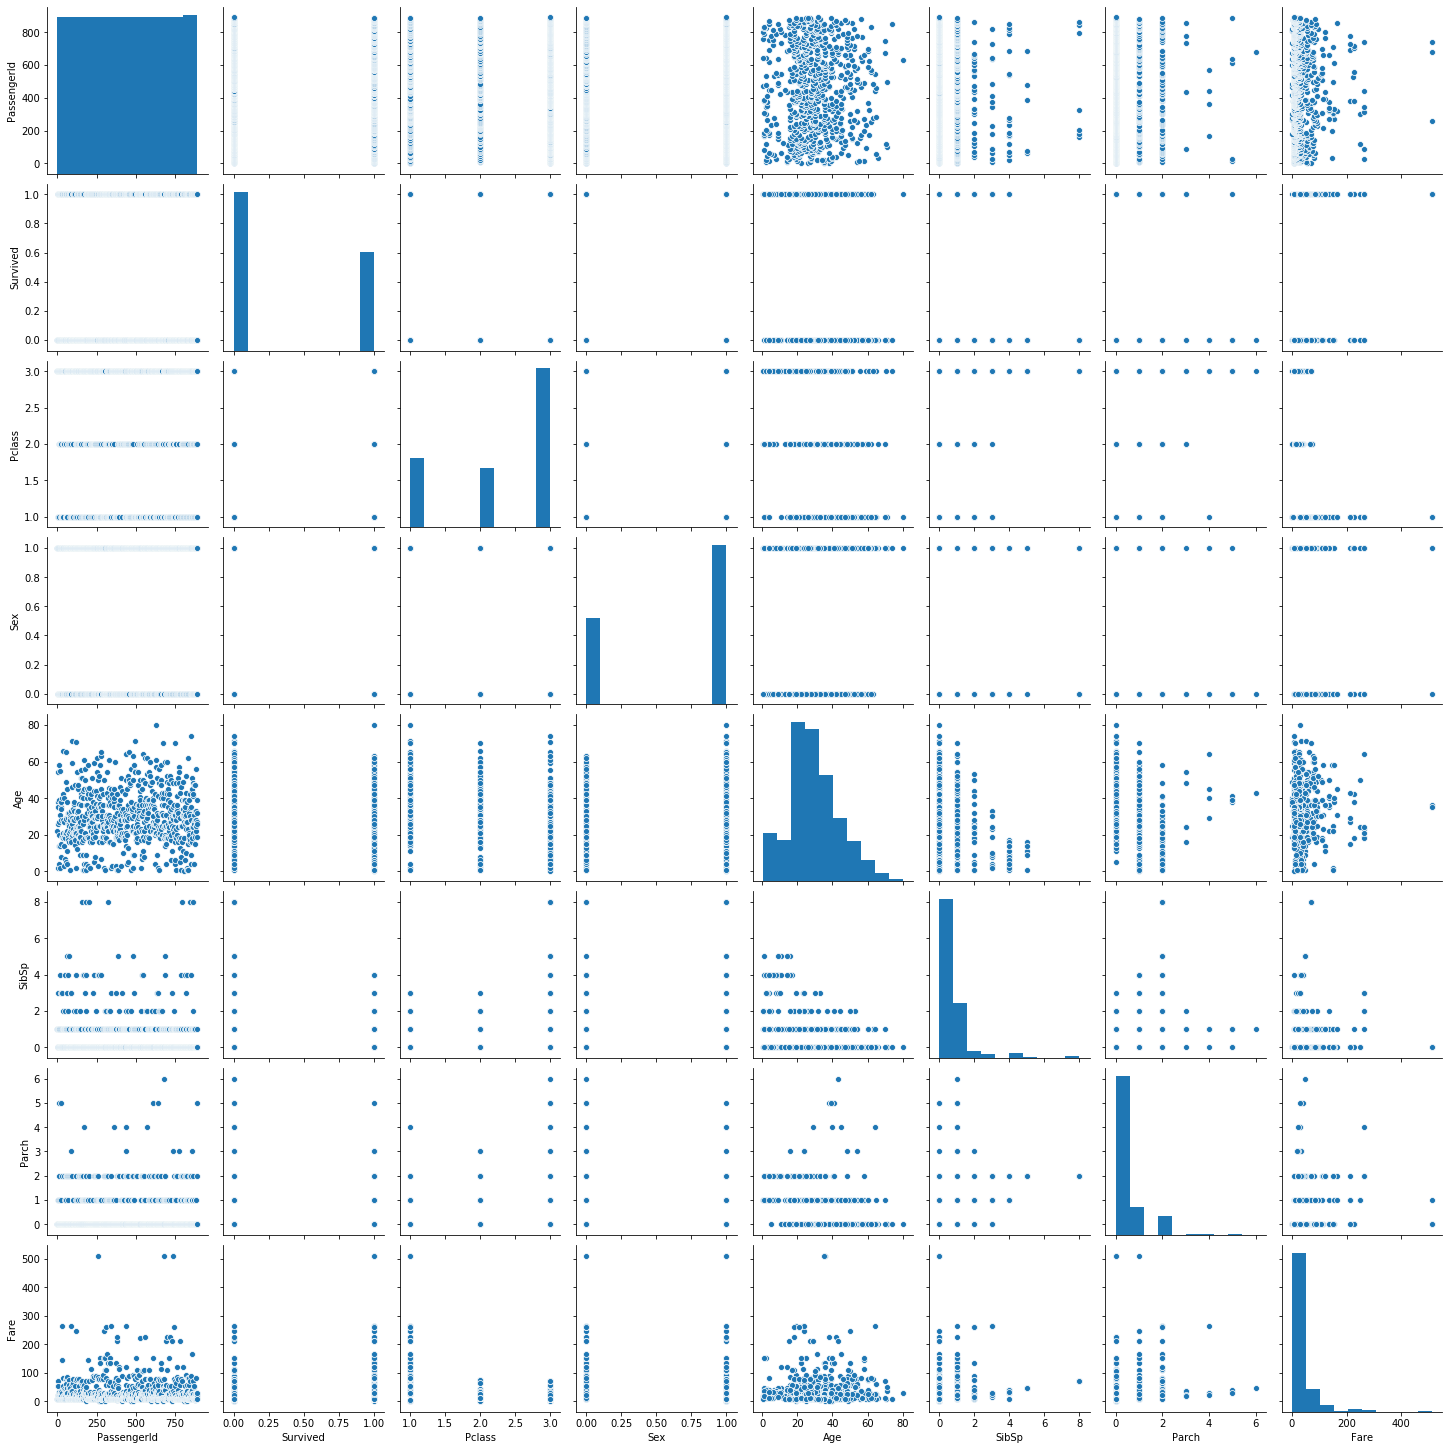

In [14]:
sns.pairplot(df)

Cose da verificare:
- si salvano principalmente persone per sesso?
- persone per età? 
- persone nella prima classe ? 
- persone con parenti? 
- persone che proengono dallo stesso posto ?
- persone che hanno speso di più ? 
- persone nella stessa cabina ? 


In [15]:
survived = df[df['Survived']==1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a5a7d10>,
      dtype=object)

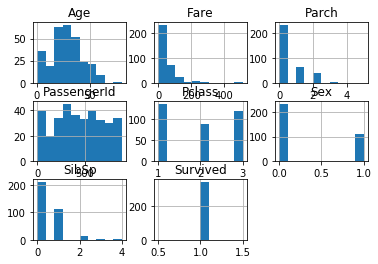

In [16]:
survived.hist()

In [17]:
#import pandas_profiling
#profile = df.profile_report(title='Pandas Profiling Report')
#profile.to_file(output_file="Titanic data profiling.html")

In [18]:
X = df[['Fare', 'Parch', 'SibSp', 'Sex', 'Pclass']]
X = pd.DataFrame(min_max_scaler.fit_transform(X))
y = df['Survived']

## Modeling

### Decsion Tree

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8135593220338984

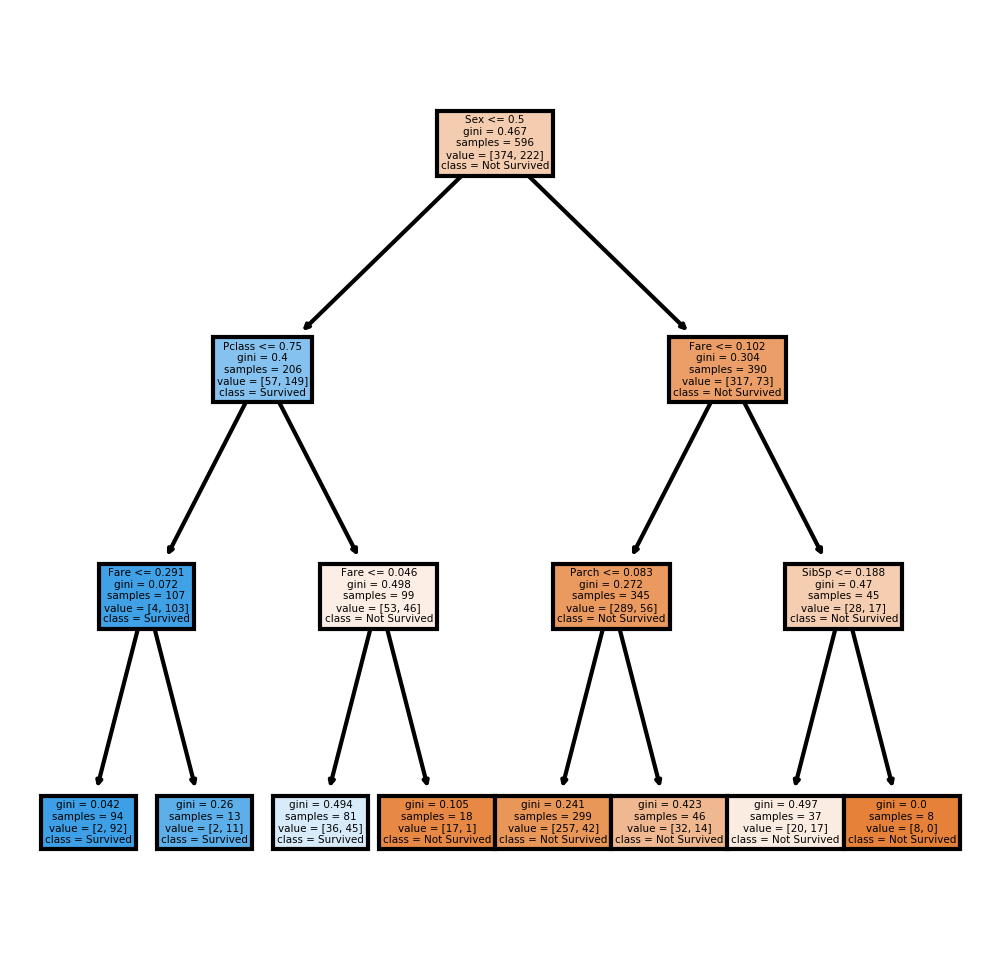

In [20]:
fn=['Fare','Parch', 'SibSp', 'Sex', 'Pclass']
cn=['Not Survived', 'Survived']
fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

### Optimization and Tuning Decision Tree

In this model should be optimized the depth and the size of test set. Anyway this kind of Model has the problem of overfitting.

## Other Models
The natural evolution of DT is Random Forest


#### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)
clf_rf= RandomForestClassifier(max_depth=3, random_state=1)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test);
accuracy_score(y_test, y_pred_rf)

0.7864406779661017

We cannot see a consistent improving

### KNN
Problem, How many k consider in the model ? (Optimization) 

In [22]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=48)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred_neigh = neigh.predict(X_test);
accuracy_score(y_test, y_pred_neigh)

0.7966101694915254

### Keras
One way to get a better accuracy could be using Deep Learning.

In [23]:
from keras import Sequential
from keras.layers import Dense

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=52)

classifier = Sequential()
classifier.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
classifier.add(Dense(1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
#First Hidden Layer
#classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=X_train.shape[1]))
#Second  Hidden Layer
#classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
#classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
#classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
#classifier.fit(X_train,y_train, batch_size=10, epochs=100)
classifier.fit(X_train, y_train, epochs=100)

#Evaluate
eval_model=classifier.evaluate(X_train, y_train)
print("eval model: " + str(eval_model))
#Prediction
y_pred_keras=classifier.predict(X_test)
y_pred_keras =(y_pred_keras>0.5)
y_pred_keras = y_pred_keras*1
y_pred_keras = [a[0] for a in y_pred_keras];
accuracy_score(y_test, y_pred_keras)

Using TensorFlow backend.
/Users/claudiocalamita/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/claudiocalamita/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/claudiocalamita/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/claudio

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
596/596 [==============================] - 1s 2ms/step - loss: 0.7735 - accuracy: 0.3893
Epoch 2/100
596/596 [==============================] - 0s 201us/step - loss: 0.7307 - accuracy: 0.3624
Epoch 3/100
596/596 [==============================] - 0s 149us/step - loss: 0.6979 - accuracy: 0.5688
Epoch 4/100
596/596 [==============================] - 0s 122us/step - loss: 0.6725 - accuracy: 0.6023
Epoch 5/100
596/596 [==============================] - 0s 124us/step - loss: 0.6553 - accuracy: 0.6174
Epoch 6/100
596/596 [==============================] - 0s 144us/step - loss: 0.6412 - accuracy: 0.6141
Epoch 7/100
596/596 [==============================] - 0s 135us/step - loss: 0.6310 - accuracy: 0.6124
Epoch 8/100
596/596 [==============================] - 0s 129us/step - loss: 0.6224 - accuracy: 0.6124
Epoch 9/100
596/596 [==============================] - 0s 129us/step - loss: 0.6163

596/596 [==============================] - 0s 158us/step - loss: 0.4478 - accuracy: 0.7919
Epoch 75/100
596/596 [==============================] - 0s 137us/step - loss: 0.4477 - accuracy: 0.7903
Epoch 76/100
596/596 [==============================] - 0s 88us/step - loss: 0.4473 - accuracy: 0.7903
Epoch 77/100
596/596 [==============================] - 0s 88us/step - loss: 0.4472 - accuracy: 0.7903
Epoch 78/100
596/596 [==============================] - 0s 89us/step - loss: 0.4470 - accuracy: 0.7903
Epoch 79/100
596/596 [==============================] - 0s 109us/step - loss: 0.4465 - accuracy: 0.7903
Epoch 80/100
596/596 [==============================] - 0s 101us/step - loss: 0.4462 - accuracy: 0.7903
Epoch 81/100
596/596 [==============================] - 0s 102us/step - loss: 0.4460 - accuracy: 0.7903
Epoch 82/100
596/596 [==============================] - 0s 124us/step - loss: 0.4459 - accuracy: 0.7903
Epoch 83/100
596/596 [==============================] - 0s 113us/step - loss: 0.

0.8033898305084746

## Test set


In [24]:
df_test = pd.read_csv('test.csv')

In [25]:
df_test['Sex'] = le.fit_transform(df_test['Sex'])

In [26]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [28]:
#### Being that Fare has just 1 Nan value, one can replace it with the mean value
## This should be optimized because we don't know if the Person acquired the ticket or enetered in the ship illegally
mean_fare = df_test['Fare'].mean()
df_test['Fare'] = df_test['Fare'].fillna(mean_fare)

In [29]:
X_test_test = df_test[['Fare','Parch', 'SibSp', 'Sex', 'Pclass']]
X_test_test = pd.DataFrame(min_max_scaler.fit_transform(X_test_test))
y_pred_test = clf.predict(X_test_test)

## Keras

In [30]:
y_test_keras=classifier.predict(X_test_test)
y_test_keras =(y_test_keras>0.5)
y_test_keras = y_test_keras*1
y_test_keras = [a[0] for a in y_test_keras];


## Output format
Let's see how the output format should be

In [31]:
#df_example = pd.read_csv('gender_submission.csv')

In [32]:
#df_output = pd.DataFrame(df_test['PassengerId'])
#df_output['Survived'] = y_pred_test


In [33]:
#df_output.to_csv('My_submission.csv', index=False)

## Keras

In [34]:
df_output = pd.DataFrame(df_test['PassengerId'])
df_output['Survived'] = y_test_keras
df_output.to_csv('My_submission_keras.csv', index=False)